# **Name: Rutuja Avinash Chabukswar**

# **Roll No : DS24MS26**

# **PROJECT : Yes Bank Stock Closing Price Prediction.**

# PROJECT DESCRIPTION :
Yes Bank is a well-known bank in the Indian financial domain.Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to
see how that impacted the stock prices of the company and whether Time series models or any
other predictive models can do justice to such situations. This dataset has monthly stock prices
of the bank since its inception and includes closing, starting, highest, and lowest stock prices of
every month. The main objective is to predict the stock’s closing price of the month.

# Importing necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Rutuja-Chabukswar/ML-Project/refs/heads/main/data_YesBank.csv")
df.head()
print(df)

       Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]


# Data Cleaning

In [ ]:
df.shape

(185, 5)

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
180,False
181,False
182,False
183,False


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, format='mixed')
#df['Date'] = pd.to_datetime(df['Date'], format='%d%b%Y:%H:%M:%S.%f')
df['Date'] = pd.to_datetime(df['Date'], format = '%b-%y')
#df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y',errors='coerce')

In [ ]:
import datetime as dt

In [ ]:
df["Date"].dt.year
df["Date"].dt.month
df["Date"].dt.day

,Date
0,1
1,1
2,1
3,1
4,1
...,...
180,1
181,1
182,1
183,1


In [ ]:
#Creating new columns year,month,day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day_name()

In [ ]:
df

,Date,Open,High,Low,Close,Year,Month,Day
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,Friday
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,Monday
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,Thursday
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,Saturday
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,Tuesday
...,...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,2020,7,Wednesday
181,2020-08-01,12.00,17.16,11.85,14.37,2020,8,Saturday
182,2020-09-01,14.30,15.34,12.75,13.15,2020,9,Tuesday
183,2020-10-01,13.30,14.01,12.11,12.42,2020,10,Thursday


# **Exploratory Data Analysis:**

# Univariate Analysis:

Univariate analysis is the process of examining one variable at a time to understand its distribution, patterns, and characteristics.

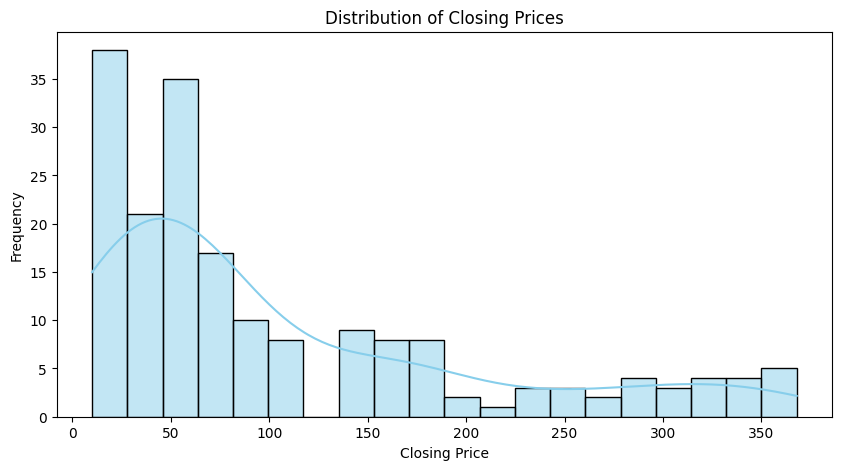

In [ ]:
#Histogram for Closing Prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], kde = True, bins=20,color='skyblue')
#We write kde=True,because it draws a smooth curve over the histogram.The curve tells us the shape and spread of the data.
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# **Observations for Histogram for Closing Prices.**

The distribution of closing prices is positively skewed (right-skewed).
A large number of records have lower closing prices which are below RS100, and fewer records are observed at higher closing prices above Rs200.
It shows High Frequency at Low Prices, and Frequency is declining with Increasing Price.
We have used kde line here, that gives a smoothed curve to understand the distribution shape.

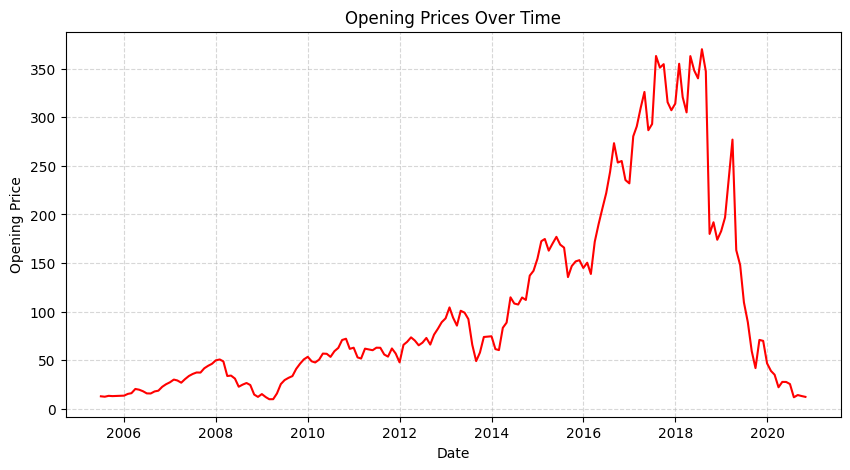

In [ ]:
#Line plot for Opening Prices
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Open'], color='red')
plt.title('Opening Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.grid(True, linestyle='--', alpha=0.5)

# **Observations of Line plot for Opening Prices:**

Here,there is an increase in Opening prices starting around year 2014,and peaking around year 2018.
There is a sudden decrease in Opening prices after year 2018.
Also, we can see that in earlier years, till year 2010 there are lower Opening prices.

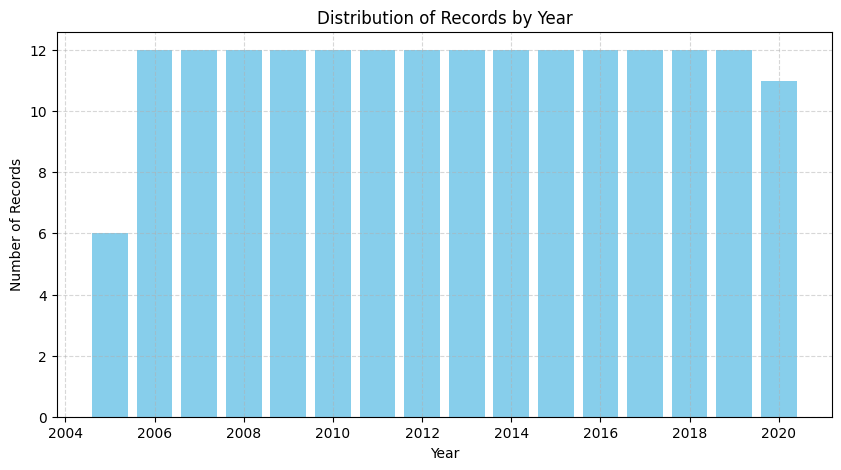

In [ ]:
#Barplot for Records per Year
#Firstly,we have to count how many rows are there for each year, and then sort them in order.
year_counts = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.title('Distribution of Records by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# **Observations for Barplot of Records per year**

Here, from year 2006 to 2019, the records are consistent.
Year 2006 has only 6 records because data itself starts from July,2005 and year 2019 has almost 11 records.
Again we see decrease in records in the year 2020.

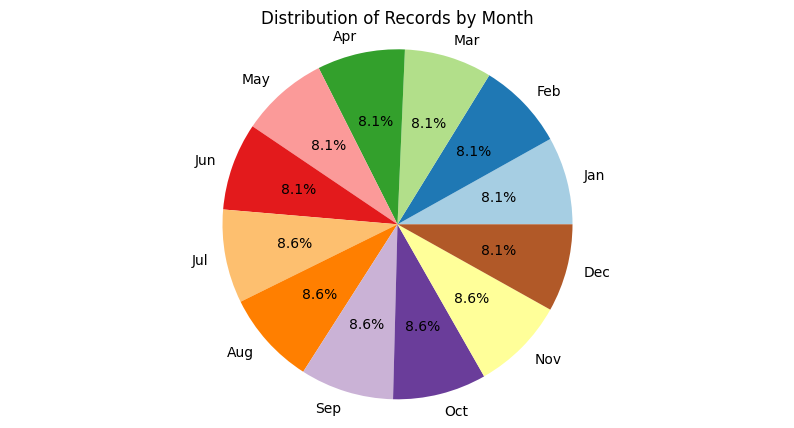

In [ ]:
#Pie Chart for Monthly data entries
#Firstly,we have to count how many rows are there for each month, and then we have sort them from 1-12.
month_counts = df['Month'].value_counts().sort_index()
#To make it more readable, we labelled the months.
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 5))
plt.pie(month_counts, labels=month_labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Records by Month')
plt.axis('equal')
plt.show()

# **Observations of Pie Chart for Monthly Data entries.:**

Here, the data is evenly spreadout throughout the year.
Secondly, all 12 months are covered without skipping a month.
And, months like Aug,Sep,Oct and Nov have a high percentage comparatively to others.

# Bivariate Analysis:

Bivariate analysis is a type of analysis that examines the relationship between two variables. The goal is to see whether  and how the variables are related.

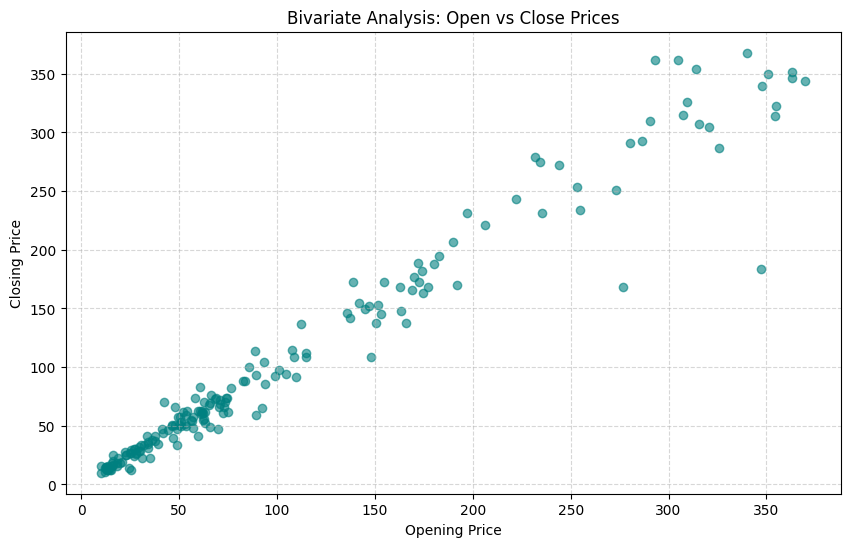

In [ ]:
#Scatter plot for Open Vs Close
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Close'], alpha=0.6, color='teal')
plt.title('Bivariate Analysis: Open vs Close Prices')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# **Observation for Scatter Plot for Open Vs Close**

Here, we can see that as the Open price increases,the Close price also tends to increase.

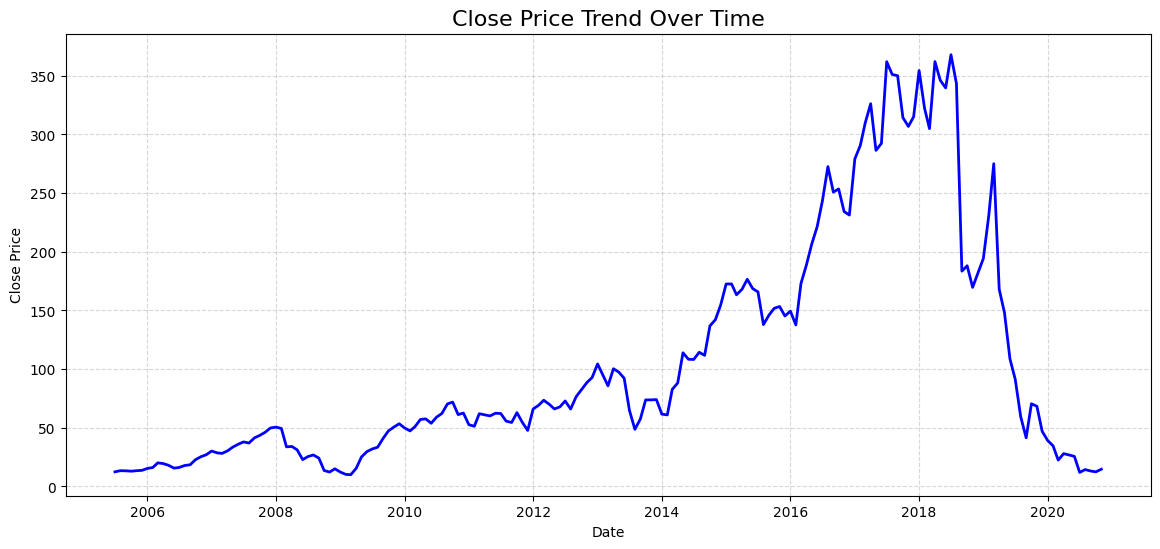

In [ ]:
#Line Chart for  Close Vs Date
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='blue', linewidth=2)
plt.title('Close Price Trend Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True, linestyle='--', alpha=0.5)
#plt.tight_layout()
plt.show()

# **Observation for Line Chart for  Close Vs Date**

We observed here that there is a sudden increase in closing price, followed by a sudden downfall of closing price, mainly after year 2018-2019.

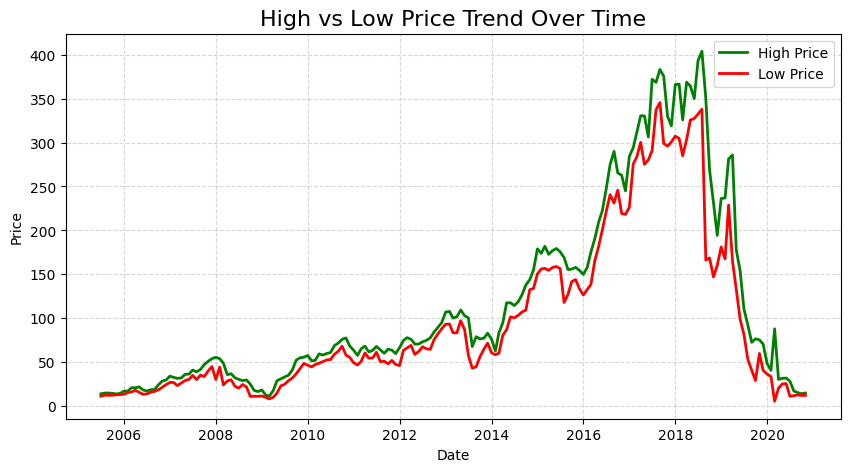

In [ ]:
#Line chart for High Vs Low Price over Date
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['High'], label='High Price', color='green', linewidth=2)
plt.plot(df['Date'], df['Low'], label='Low Price', color='red', linewidth=2)
plt.title('High vs Low Price Trend Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# **Observation for Line Chart for High Vs Low Price Over Date**

Here, between year 2016 and 2018, High-Low range is more.
After year 2019, both High and Low values dropped, indicating falling prices trend.



# **Multivariate Analysis**

Multivariate analysis is a technique used to understand relationships between three or more variables at the same time.

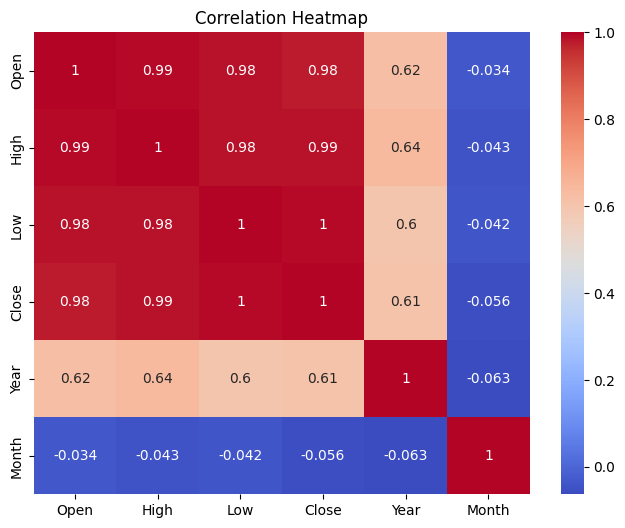

In [ ]:
#Heatmap (Correlation Matrix)
#Because we want only numeric data
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Correlation Analysis**

Here, we see a Positive Correlation.
High, Low, Open all are strongly correlated with Close.

# Outlier Treatment:

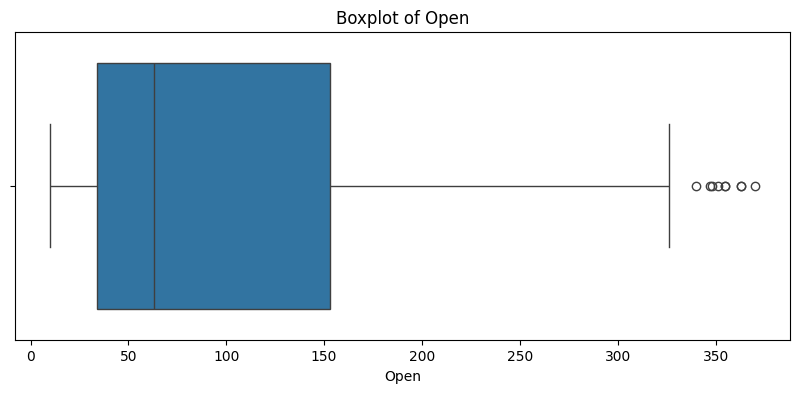

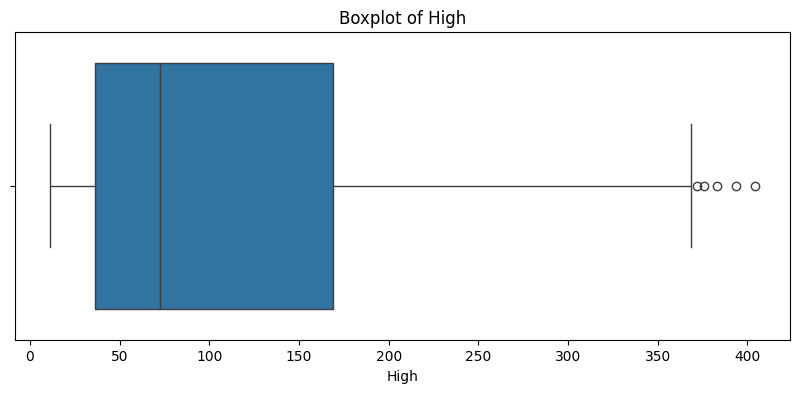

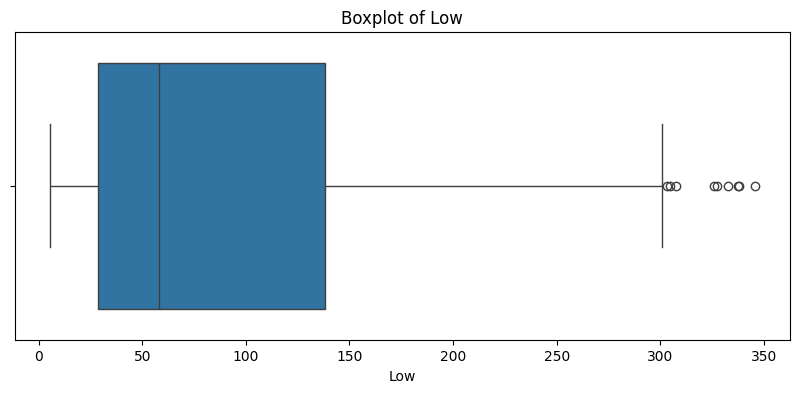

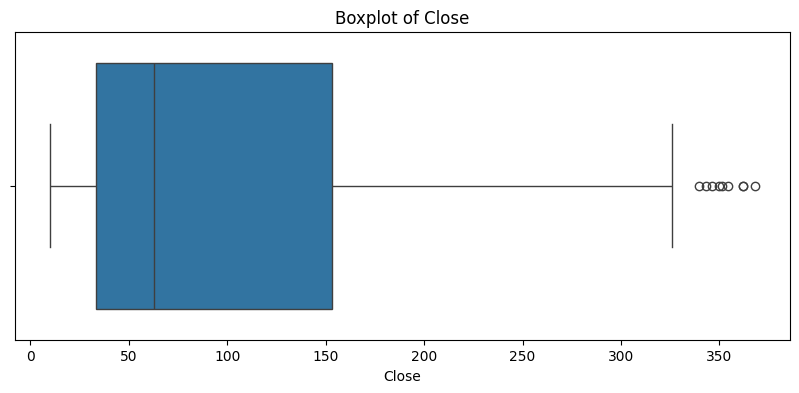

In [ ]:
for column in ['Open','High','Low','Close']:
  plt.figure(figsize = (10,4))
  sns.boxplot(x = df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Year', 'Month', 'Day'], dtype='object')

In [ ]:
df=df.drop(['Month'],axis=1)
df=df.drop(['Year'],axis=1)
df=df.drop(['Day'],axis=1)
df=df.drop(['Date'],axis=1)

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df.head()

,Open,High,Low,Close
0,13.00,14.00,11.25,12.46
1,12.58,14.88,12.55,13.42
2,13.48,14.87,12.27,13.30
3,13.20,14.47,12.40,12.99
4,13.35,13.88,12.88,13.41


# Model Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB


In [ ]:
x = df.drop(['Close'], axis =1).values # Independent variable
y = df['Close'].values # dependent variable

In [ ]:
x

array([[ 13.  ,  14.  ,  11.25],
       [ 12.58,  14.88,  12.55],
       [ 13.48,  14.87,  12.27],
       [ 13.2 ,  14.47,  12.4 ],
       [ 13.35,  13.88,  12.88],
       [ 13.49,  14.44,  13.  ],
       [ 13.68,  17.16,  13.58],
       [ 15.5 ,  16.97,  15.4 ],
       [ 16.2 ,  20.95,  16.02],
       [ 20.56,  20.8 ,  18.02],
       [ 19.8 ,  21.8 ,  15.8 ],
       [ 18.2 ,  18.4 ,  13.4 ],
       [ 16.  ,  17.2 ,  13.82],
       [ 15.9 ,  18.6 ,  15.7 ],
       [ 18.  ,  18.88,  16.8 ],
       [ 18.78,  24.2 ,  18.5 ],
       [ 22.8 ,  28.47,  21.4 ],
       [ 25.4 ,  29.66,  24.4 ],
       [ 27.4 ,  34.16,  27.  ],
       [ 30.2 ,  32.6 ,  26.8 ],
       [ 29.3 ,  31.58,  23.31],
       [ 27.  ,  31.99,  26.2 ],
       [ 30.66,  36.14,  29.11],
       [ 33.89,  36.38,  30.4 ],
       [ 35.98,  41.04,  35.02],
       [ 37.5 ,  39.  ,  30.2 ],
       [ 37.4 ,  41.75,  35.3 ],
       [ 41.8 ,  47.3 ,  33.6 ],
       [ 44.4 ,  50.98,  40.02],
       [ 46.4 ,  54.  ,  45.  ],
       [ 4

In [ ]:
y

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[-0.39052414, -0.41760466, -0.42425935],
       [-0.60920958, -0.66204125, -0.81256322],
       [-0.53202648, -0.5603852 , -0.50389198],
       [-0.17084917, -0.12511249, -0.06401649],
       [-0.73705645, -0.73467911, -0.69436023],
       [-0.48690405, -0.5439354 , -0.48330667],
       [-0.47067581, -0.52286488, -0.52653582],
       [-0.47166534, -0.45096633, -0.39652336],
       [ 0.51786154,  0.4829755 ,  0.60045551],
       [-0.72201564, -0.75353169, -0.7465819 ],
       [ 1.43020532,  1.31396747,  1.30003088],
       [-0.97038689, -0.96091002, -0.95319337],
       [ 0.31283157,  0.31847753,  0.37802586],
       [-0.58961694, -0.61518705, -0.59273383],
       [-0.99373972, -0.95213064, -0.96608627],
       [ 1.20241623,  1.51349056,  1.37803836],
       [-0.46988419, -0.52674629, -0.53867031],
       [-0.96247067, -0.98022467, -0.93943371],
       [ 1.68154515,  1.60479618,  1.91228122],
       [-0.91299433, -0.94390574, -0.92859934],
       [ 1.61128874,  1.56607446,  1.431

In [ ]:
x_test

array([[ 1.97048699,  1.94109286,  2.17869841],
       [-0.93971155, -0.95712103, -0.9069306 ],
       [-0.97246489, -0.99843035, -0.96651964],
       [ 0.04090958,  0.05833046,  0.08744802],
       [-0.24506369, -0.17316808, -0.1698683 ],
       [ 2.27130317,  2.52117923,  2.52810689],
       [-0.8971619 , -0.91248478, -0.90259685],
       [-0.79919874, -0.80750181, -0.80476248],
       [ 0.28037509,  0.50441568,  0.42515538],
       [-0.82591596, -0.81831432, -0.78991939],
       [-0.83976934, -0.8524153 , -0.9535184 ],
       [ 0.62868855,  0.68166686,  0.6618864 ],
       [-0.96148115, -0.98447574, -0.94257568],
       [-0.21438835, -0.02715303, -0.13140629],
       [-0.3964613 , -0.46159401, -0.43617716],
       [-0.74477476, -0.30116228, -1.01364916],
       [-0.47958156, -0.48312661, -0.41830044],
       [ 0.65837435,  0.54396912,  0.64780171],
       [-0.9467372 , -0.94945062, -0.95189324],
       [-0.84174839, -0.83984691, -0.80942126],
       [-0.72300517, -0.72811768, -0.691

# **Importing Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr_pred = lr.predict(x_test)
lr_pred

array([322.30490764,  17.99084639,  11.7392242 , 118.50119099,
        95.94335678, 372.63630815,  18.74687857,  28.84907306,
       163.25398473,  31.00388691,  14.43787711, 177.56160023,
        14.212761  , 106.30214315,  62.33485851,  35.37479594,
        67.07735602, 166.84259154,  14.57764093,  28.76455589,
        40.07692678,  26.60351615,  28.8336679 ,  44.06007112,
        18.95122546, 261.45202702, 195.84715123,  15.05317494,
       141.64895711, 216.47795851,  49.79732885,  47.24544058,
        15.24635353,  52.09784394,  74.36282104, 163.38740072,
        27.98999454])

In [ ]:
y_test

array([326.14,  16.12,  10.26, 111.7 , 100.28, 367.9 ,  18.03,  31.93,
       172.91,  30.31,  11.95, 181.75,  12.42, 113.89,  66.02,  22.45,
        61.02, 168.6 ,  12.26,  26.97,  41.36,  27.95,  26.83,  46.95,
        17.84, 253.52, 231.2 ,  13.15, 142.08, 194.3 ,  70.45,  48.65,
        13.71,  51.29,  73.46, 172.55,  29.68])

# **Predicting the Scores**

In [ ]:
print((lr.score(x_train, y_train))*100)
print((lr.score(x_test, y_test))*100)

99.59350322988837
99.07789240514468


# Visualize

<Axes: >

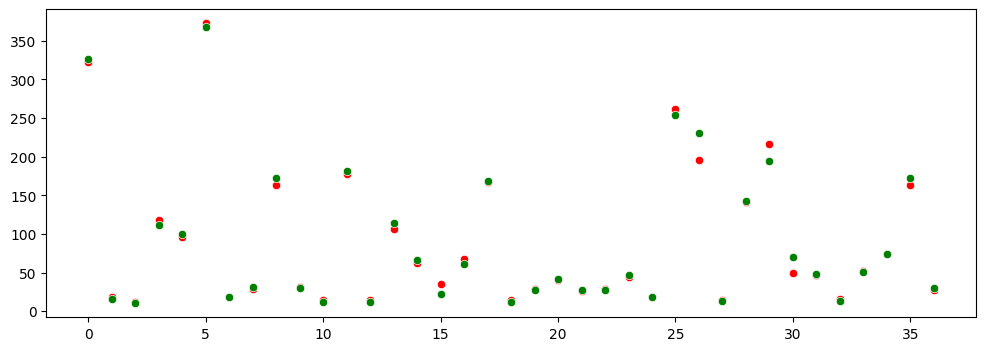

In [ ]:
plt.figure(figsize = (12,4))
sns.scatterplot(lr_pred, color = 'r')
sns.scatterplot(y_test, color = 'g')

# **Evaluation Metrics**

In [ ]:
# Importing Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, lr_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, lr_pred)
print("R2 Linear regression :" ,r2*100)

MSE : 77.56097526458909
RMSE : 8.806870912224676
R2 Linear regression : 99.07789240514468


# **Difference**

In [ ]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : lr_pred.astype(int), "Difference" : abs(y_test - lr_pred)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
13,113.89,106,7.587857
21,27.95,26,1.346484
18,12.26,14,2.317641
14,66.02,62,3.685141
0,326.14,322,3.835092
12,12.42,14,1.792761
3,111.70,118,6.801191
10,11.95,14,2.487877
7,31.93,28,3.080927
1,16.12,17,1.870846


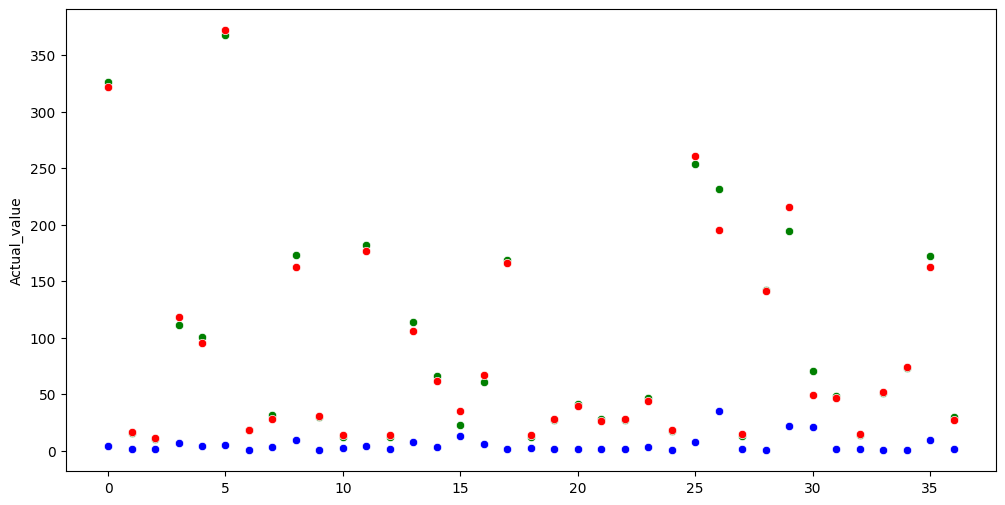

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(diff['Actual_value'], color = 'g')
sns.scatterplot(diff['Predicted_Value'], color = 'r')
sns.scatterplot(diff['Difference'], color = 'b')
plt.show()

# **Performing Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("Training:", ((cross_val_score(lr, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(lr, x_test, y_test))*100).mean().astype(int), "%")

Training: 99 %
Testing: 97 %


# **Importing Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
model_pred = model.predict(x_test)
model_pred

array([315.05,  18.46,   9.98, 136.83,  85.71, 339.6 ,  19.49,  28.63,
       154.57,  25.6 ,  25.12, 176.52,  12.99,  92.2 ,  68.3 ,  41.45,
        62.13, 176.52,  15.03,  26.85,  39.2 ,  25.45,  26.85,  41.45,
        18.46, 272.56, 188.05,  14.67, 145.92, 206.39,  41.45,  41.45,
        13.42,  49.84,  76.44, 163.31,  26.85])

In [ ]:
y_test

array([326.14,  16.12,  10.26, 111.7 , 100.28, 367.9 ,  18.03,  31.93,
       172.91,  30.31,  11.95, 181.75,  12.42, 113.89,  66.02,  22.45,
        61.02, 168.6 ,  12.26,  26.97,  41.36,  27.95,  26.83,  46.95,
        17.84, 253.52, 231.2 ,  13.15, 142.08, 194.3 ,  70.45,  48.65,
        13.71,  51.29,  73.46, 172.55,  29.68])

# **Predicting the Scores**

In [ ]:
print((model.score(x_train, y_train))*100)
print((model.score(x_test, y_test))*100)

100.0
97.85335211243512


# **Visualize**

<Axes: >

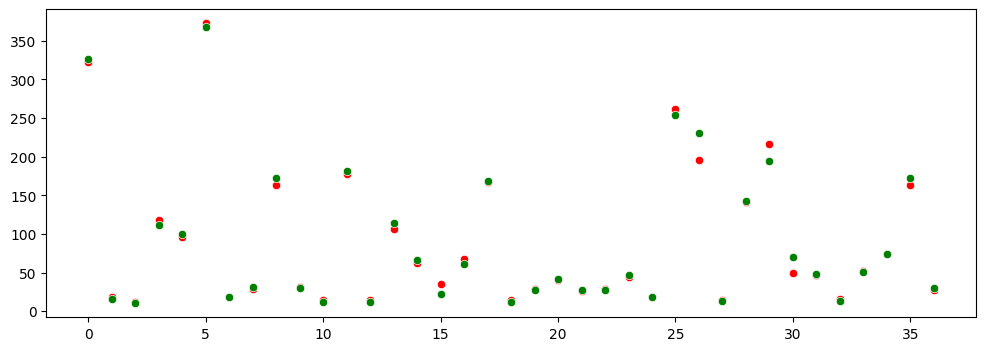

In [ ]:
plt.figure(figsize = (12,4))
sns.scatterplot(lr_pred, color = 'r')
sns.scatterplot(y_test, color = 'g')

# **Evaluation Metrics**

In [ ]:
# Importing Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, model_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, model_pred)
print("R2 Decision Tree Regressor :" ,r2*100)

MSE : 180.56038648648635
RMSE : 13.437276006932594
R2 Decision Tree Regressor : 97.85335211243512


# **Difference**

In [ ]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : model_pred.astype(int), "Difference" : abs(y_test - model_pred)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
17,168.60,176,7.92
7,31.93,28,3.30
8,172.91,154,18.34
16,61.02,62,1.11
13,113.89,92,21.69
4,100.28,85,14.57
35,172.55,163,9.24
3,111.70,136,25.13
10,11.95,25,13.17
11,181.75,176,5.23


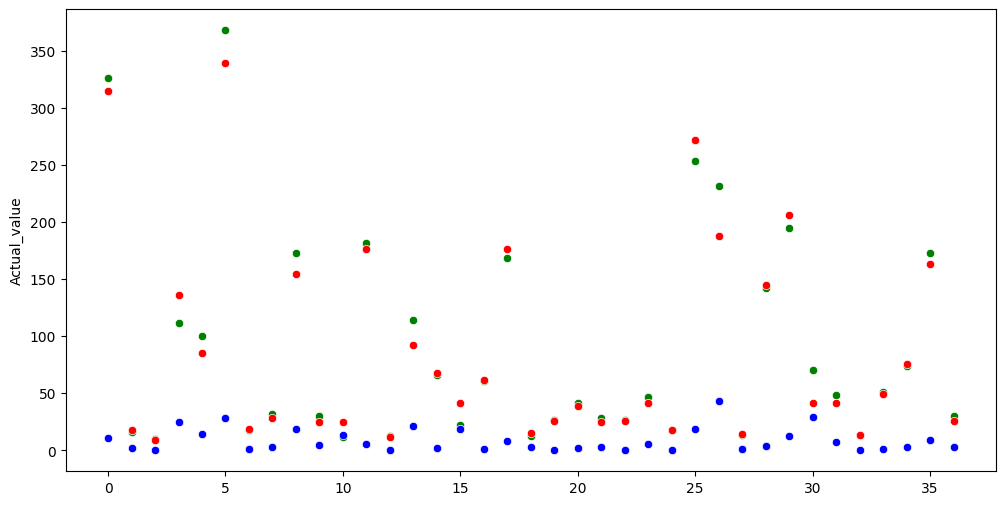

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(diff['Actual_value'], color = 'g')
sns.scatterplot(diff['Predicted_Value'], color = 'r')
sns.scatterplot(diff['Difference'], color = 'b')
plt.show()

# **Performing Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("Training:", ((cross_val_score(model, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(model, x_test, y_test))*100).mean().astype(int), "%")

Training: 98 %
Testing: 90 %


# **Importing Support Vector Machine**

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm_model = SVR()
svm_model.fit(x_train, y_train)

SVR()

In [ ]:
svm_model_pred = svm_model.predict(x_test)
svm_model_pred

array([121.42549616,  51.00337134,  51.07444564,  98.62437496,
        81.65674551, 116.04536939,  51.05642047,  52.14050114,
       115.81864549,  52.03732198,  51.28229826, 123.13909415,
        51.02176405,  86.55164634,  66.64713261,  58.55716232,
        65.06975404, 122.2075032 ,  50.98061814,  51.74981   ,
        54.21140402,  51.4740196 ,  51.7206819 ,  63.2243582 ,
        51.00644447, 125.47089986, 125.64493497,  50.99750417,
       110.60675825, 125.59761732,  58.55221319,  62.44995338,
        51.01512138,  59.40574596,  69.29262241, 121.20792435,
        51.73870885])

In [ ]:
y_test

array([326.14,  16.12,  10.26, 111.7 , 100.28, 367.9 ,  18.03,  31.93,
       172.91,  30.31,  11.95, 181.75,  12.42, 113.89,  66.02,  22.45,
        61.02, 168.6 ,  12.26,  26.97,  41.36,  27.95,  26.83,  46.95,
        17.84, 253.52, 231.2 ,  13.15, 142.08, 194.3 ,  70.45,  48.65,
        13.71,  51.29,  73.46, 172.55,  29.68])

# **Predicitng the Scores**

In [ ]:
print((svm_model.score(x_train, y_train))*100)
print((svm_model.score(x_test, y_test))*100)

34.79497417508026
45.66823293184251


# **Visualize**

<Axes: >

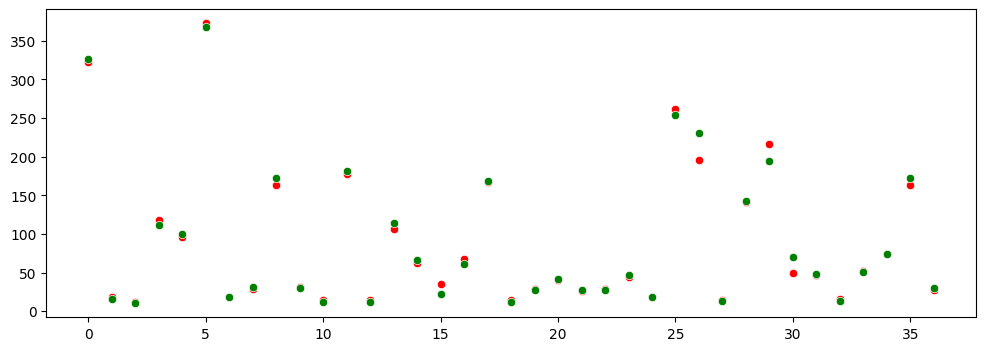

In [ ]:
plt.figure(figsize = (12,4))
sns.scatterplot(lr_pred, color = 'r')
sns.scatterplot(y_test, color = 'g')

# **Evaluation Metrics**

In [ ]:
# Importing Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, svm_model_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, svm_model_pred)
print("R2 SVM :" ,r2*100)

MSE : 4569.992553109746
RMSE : 67.60172004549696
R2 SVM : 45.66823293184251


# **Difference**

In [ ]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : svm_model_pred.astype(int), "Difference" : abs(y_test - svm_model_pred)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
20,41.36,54,12.851404
15,22.45,58,36.107162
31,48.65,62,13.799953
26,231.20,125,105.555065
9,30.31,52,21.727322
8,172.91,115,57.091355
36,29.68,51,22.058709
1,16.12,51,34.883371
24,17.84,51,33.166444
0,326.14,121,204.714504


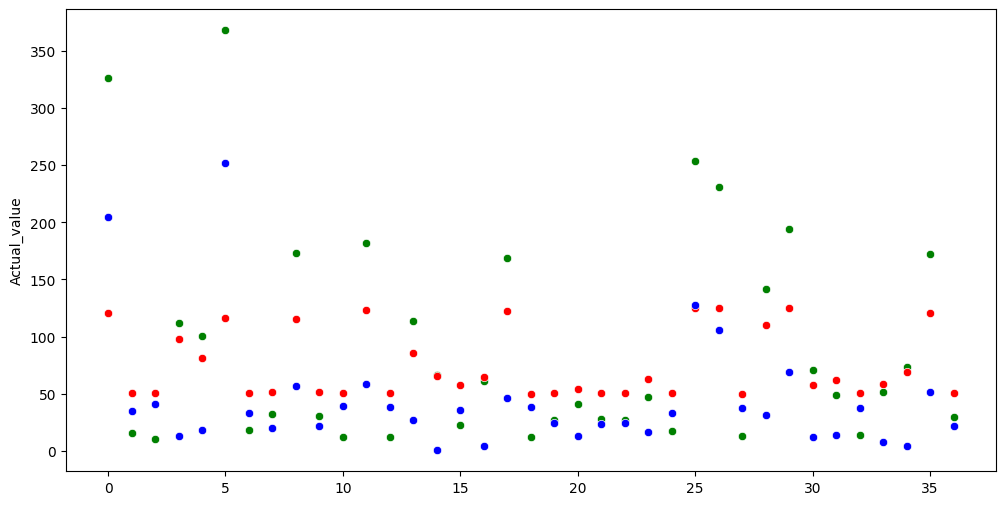

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(diff['Actual_value'], color = 'g')
sns.scatterplot(diff['Predicted_Value'], color = 'r')
sns.scatterplot(diff['Difference'], color = 'b')
plt.show()

# **Performing Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("Training:", ((cross_val_score(svm_model, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(svm_model, x_test, y_test))*100).mean().astype(int), "%")

Training: 25 %
Testing: -11 %


# **Importing Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
rf_pred = rf.predict(x_test)
rf_pred

array([314.7394,  18.3732,  13.2238, 121.3318,  88.6437, 345.883 ,
        19.6083,  27.6815, 155.2789,  26.496 ,  19.4839, 171.6042,
        13.2318,  98.6984,  63.8349,  46.2999,  63.5365, 171.7138,
        13.4081,  26.0454,  39.497 ,  25.0873,  26.0341,  47.5446,
        18.4241, 265.9735, 190.0018,  13.5809, 143.2429, 203.6267,
        49.2145,  51.133 ,  13.5655,  50.2122,  73.4124, 166.3014,
        25.8914])

In [ ]:
y_test

array([326.14,  16.12,  10.26, 111.7 , 100.28, 367.9 ,  18.03,  31.93,
       172.91,  30.31,  11.95, 181.75,  12.42, 113.89,  66.02,  22.45,
        61.02, 168.6 ,  12.26,  26.97,  41.36,  27.95,  26.83,  46.95,
        17.84, 253.52, 231.2 ,  13.15, 142.08, 194.3 ,  70.45,  48.65,
        13.71,  51.29,  73.46, 172.55,  29.68])

# **Predicting the Scores**

In [ ]:
print((rf.score(x_train, y_train))*100)
print((rf.score(x_test, y_test))*100)

99.84708071227652
98.50547026420844


# **Visualize**

<Axes: >

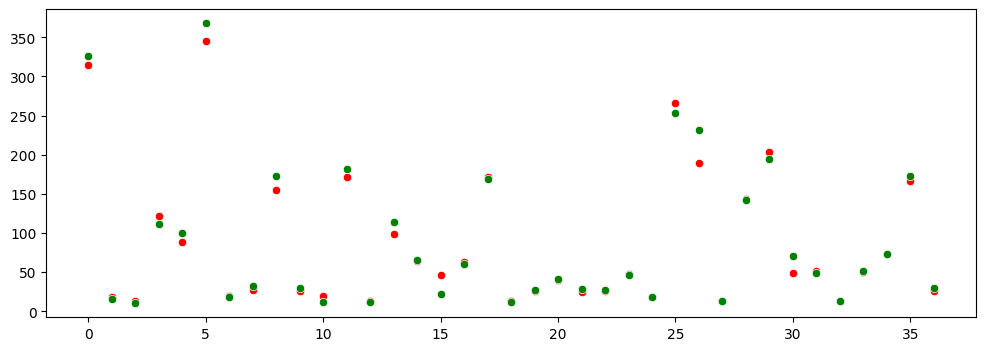

In [ ]:
plt.figure(figsize = (12,4))
sns.scatterplot(rf_pred, color = 'r')
sns.scatterplot(y_test, color = 'g')

# **Evaluation Metrics**

In [ ]:
# Importing Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, rf_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, rf_pred)
print("R2 SVM :" ,r2*100)

MSE : 125.7089568686494
RMSE : 11.212000573878392
R2 SVM : 98.50547026420844


# **Difference**

In [ ]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : rf_pred.astype(int), "Difference" : abs(y_test - rf_pred)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
11,181.75,171,10.1458
5,367.90,345,22.0170
18,12.26,13,1.1481
23,46.95,47,0.5946
13,113.89,98,15.1916
33,51.29,50,1.0778
36,29.68,25,3.7886
12,12.42,13,0.8118
16,61.02,63,2.5165
25,253.52,265,12.4535


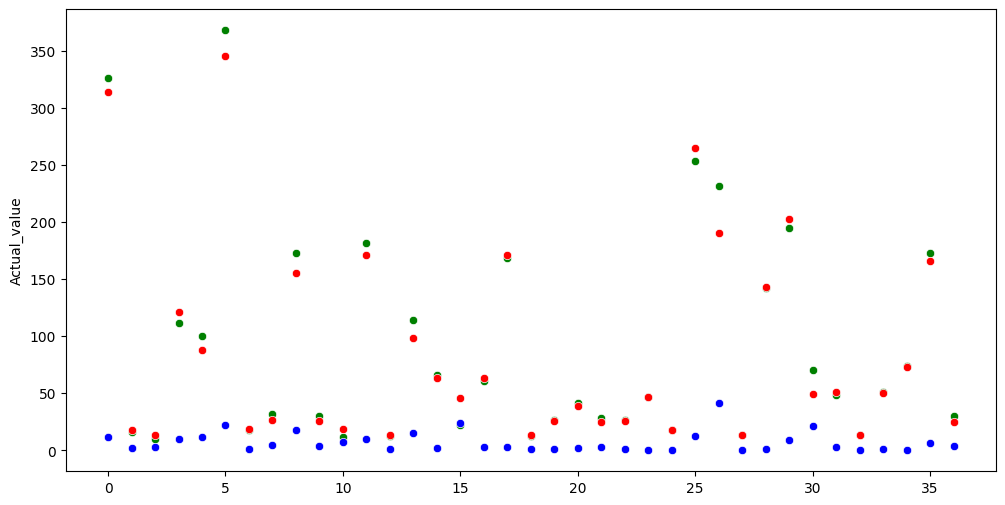

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(diff['Actual_value'], color = 'g')
sns.scatterplot(diff['Predicted_Value'], color = 'r')
sns.scatterplot(diff['Difference'], color = 'b')
plt.show()

# **Performing Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("Training:", ((cross_val_score(rf, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(rf, x_test, y_test))*100).mean().astype(int), "%")

Training: 98 %
Testing: 92 %


# **Importing K Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
knn_model_pred = knn_model.predict(x_test)
knn_model_pred

array([304.59 ,  17.13 ,  12.68 , 113.048,  91.916, 346.07 ,  19.286,
        26.414, 153.972,  27.876,  21.284, 172.452,  13.116,  94.862,
        65.614,  46.11 ,  65.004, 172.452,  14.626,  26.008,  38.788,
        24.906,  26.008,  50.372,  17.13 , 262.368, 194.824,  13.558,
       147.872, 194.824,  52.558,  50.372,  13.558,  51.498,  71.252,
       172.452,  26.034])

In [ ]:
y_test

array([326.14,  16.12,  10.26, 111.7 , 100.28, 367.9 ,  18.03,  31.93,
       172.91,  30.31,  11.95, 181.75,  12.42, 113.89,  66.02,  22.45,
        61.02, 168.6 ,  12.26,  26.97,  41.36,  27.95,  26.83,  46.95,
        17.84, 253.52, 231.2 ,  13.15, 142.08, 194.3 ,  70.45,  48.65,
        13.71,  51.29,  73.46, 172.55,  29.68])

# **Predicting the scores**

In [ ]:
print((knn_model.score(x_train, y_train))*100)
print((knn_model.score(x_test, y_test))*100)

98.95222836341327
98.60062606657142


# **Visualize**

<Axes: >

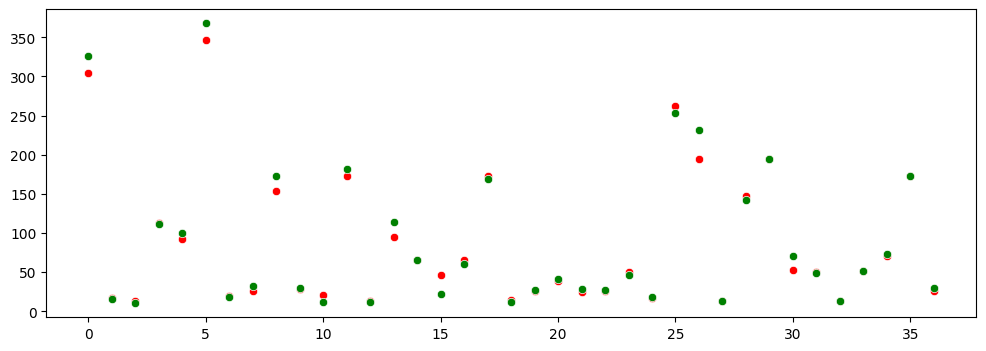

In [ ]:
plt.figure(figsize = (12,4))
sns.scatterplot(knn_model_pred, color = 'r')
sns.scatterplot(y_test, color = 'g')

# **Evaluation Metrics**

In [ ]:
# Importing Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, knn_model_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, knn_model_pred)
print("R2 SVM :" ,r2*100)

MSE : 117.70514378378384
RMSE : 10.849200144885513
R2 SVM : 98.60062606657142


# **Difference**

In [ ]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : knn_model_pred.astype(int), "Difference" : abs(y_test - knn_model_pred)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
36,29.68,26,3.646
26,231.20,194,36.376
9,30.31,27,2.434
31,48.65,50,1.722
1,16.12,17,1.010
10,11.95,21,9.334
19,26.97,26,0.962
6,18.03,19,1.256
3,111.70,113,1.348
18,12.26,14,2.366


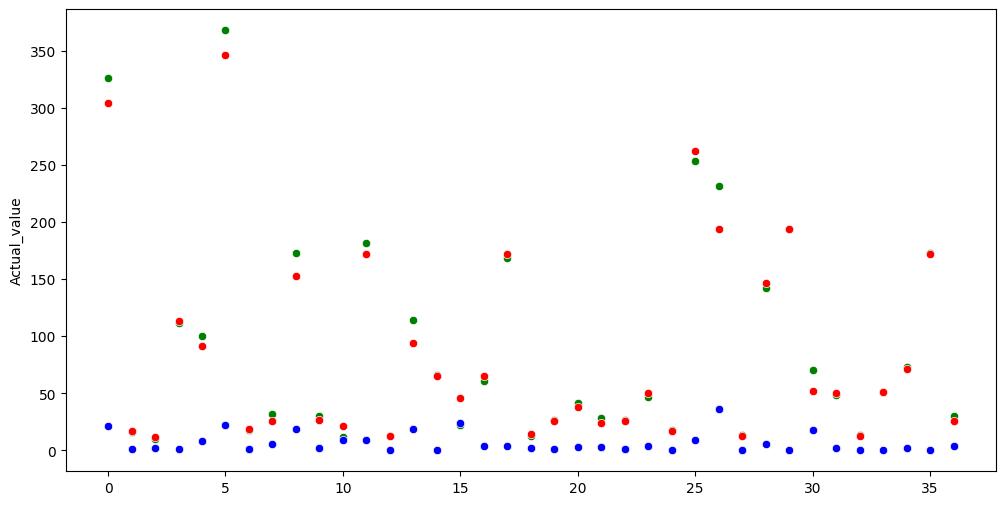

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(diff['Actual_value'], color = 'g')
sns.scatterplot(diff['Predicted_Value'], color = 'r')
sns.scatterplot(diff['Difference'], color = 'b')
plt.show()

# **Performing Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("Training:", ((cross_val_score(knn_model, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(knn_model, x_test, y_test))*100).mean().astype(int), "%")

Training: 97 %
Testing: 88 %


# **Printing all Scores using DataFrame**

In [ ]:
all_scores = pd.DataFrame({'Linear Regression': ((lr.score(x_train, y_train))*100, (lr.score(x_test, y_test))*100),
                           'Decision Tress Regressor': ((model.score(x_train, y_train))*100, (model.score(x_test, y_test))*100),
                           'Random Forest Regressor': ((rf.score(x_train, y_train))*100, (rf.score(x_test, y_test))*100),
                           'Support Vector Machine': ((svm_model.score(x_train, y_train))*100, (svm_model.score(x_test, y_test))*100),
                           'K Nearest Neighbor': ((knn_model.score(x_train, y_train))*100, (knn_model.score(x_test, y_test))*100)})
all_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Linear Regression,99.593503,99.077892
Decision Tress Regressor,100.000000,97.853352
Random Forest Regressor,99.847081,98.505470
Support Vector Machine,34.794974,45.668233
K Nearest Neighbor,98.952228,98.600626


# **Final Conclusion**

1.)Linear Regression has high accuracy on both training and test sets, with the least overfitting.
2.)Decision Tree achieves 100% on training, it is a sign of overfitting,and slightly lower test performance.
3.)Random Forest performs very well, with excellent generalization and near-equal training and test scores.
4.)Support Vector Machine performs very poorly,mostly due to the
scale or structure of the data.
5.)KNN performs decently, but not quite as well as Linear Regression or Random Forest.

# **Best Model Recoomendation**

Linear Regression or Random Forest Regressor
Both are great options, but:
1.If interpretability is important, go for Linear Regression.   
2.If you want slightly more robust performance i.e consistently reliable, go for Random Forest.   